In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [3]:
raw_premiere = pd.read_csv("premiere.csv")

In [4]:
raw_premiere.head()

,device_id,visit_id,platform,video_seconds_spent
0,3292390206845684908:6917548403849237210,3292390206845684908:6917548403849237210:00000003,OTT,2
1,3292460813960844391:6917530187819202032,3292460813960844391:6917530187819202032:00000002,OTT,2
2,3281439264306859550:6917530167418072015,3281439264306859550:6917530167418072015:00000013,OTT,2
3,3292453742297201563:6917530215736434058,3292453742297201563:6917530215736434058:00000002,OTT,2
4,3292454154614076390:6917530147017068792,3292454154614076390:6917530147017068792:00000002,OTT,2


In [5]:
premiere = raw_premiere

In [6]:
# Turn video_seconds_spent to video_minutes_spent for better analysis
premiere['video_minutes_spent'] = premiere['video_seconds_spent']/60
premiere.head()

,device_id,visit_id,platform,video_seconds_spent,video_minutes_spent
0,3292390206845684908:6917548403849237210,3292390206845684908:6917548403849237210:00000003,OTT,2,0.033333
1,3292460813960844391:6917530187819202032,3292460813960844391:6917530187819202032:00000002,OTT,2,0.033333
2,3281439264306859550:6917530167418072015,3281439264306859550:6917530167418072015:00000013,OTT,2,0.033333
3,3292453742297201563:6917530215736434058,3292453742297201563:6917530215736434058:00000002,OTT,2,0.033333
4,3292454154614076390:6917530147017068792,3292454154614076390:6917530147017068792:00000002,OTT,2,0.033333


In [7]:
# Check out the maximum watch time
max(premiere['video_minutes_spent'])

2059.366666666667

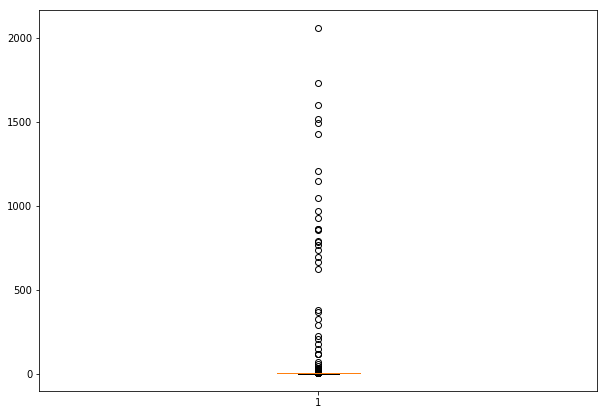

In [8]:
data = premiere['video_minutes_spent']
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(data) 
  
# show plot 
plt.show() 

In [9]:
platform_distribution = raw_premiere.groupby(['platform']).count().sort_values(['visit_id'], ascending = False)
platform_distribution

,device_id,visit_id,video_seconds_spent,video_minutes_spent
platform,,,,
DESKTOP,1303,1303,1303,1303
MOBILE_WEB,1252,1252,1252,1252
MOBILE_APP,531,531,531,531
OTT,469,469,469,469


In [11]:
# Unify the font 
Afont = {'fontname':'Arial'}

In [23]:
cmap = plt.get_cmap('Blues')
color1 = [cmap(i) for i in np.linspace(1, 0, 5)]

Text(0.5, 1.0, 'Viewership Share')

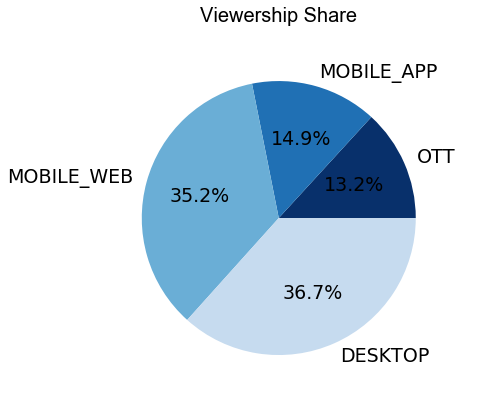

In [24]:
platform_labels = platform_distribution.device_id.sort_values().index
platform_counts = platform_distribution.device_id.sort_values()
fig, ax = plt.subplots(1,1,figsize=(7,7)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

ax.pie(platform_counts, labels = platform_labels, colors = color1, radius = 0.9, autopct = '%1.1f%%', textprops={'fontsize': 19}) #plot first pie
ax.set_title('Viewership Share', fontsize = 20, **Afont)

In [14]:
total_spent_time = raw_premiere.groupby(['platform']).sum().sort_values(['video_seconds_spent'], ascending = False)
total_spent_time

,video_seconds_spent,video_minutes_spent
platform,,
OTT,1070360,17839.333333
DESKTOP,422968,7049.466667
MOBILE_WEB,131945,2199.083333
MOBILE_APP,113756,1895.933333


Text(0.5, 1.0, 'Total Time Spent Share')

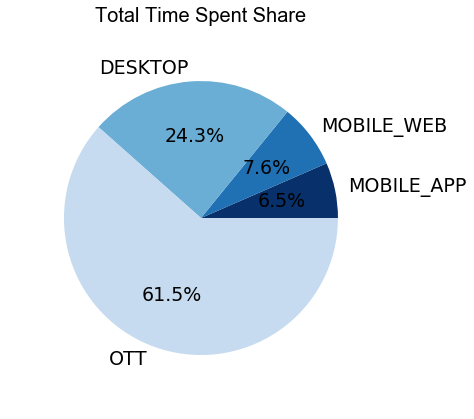

In [16]:
seconds_labels = total_spent_time.video_seconds_spent.sort_values().index
seconds_counts = total_spent_time.video_seconds_spent.sort_values()
fig, ax = plt.subplots(1,1,figsize=(7,7)) #ax1,ax2 refer to your two pies
ax.pie(seconds_counts, labels = seconds_labels, colors = colors, radius = 0.9, autopct = '%1.1f%%', textprops={'fontsize': 19}) #plot second pie
ax.set_title('Total Time Spent Share', fontsize = 20, **Afont)

In [29]:
color1 = [cmap(i) for i in np.linspace(.2, 0.8, 4)]

Text(0.5, 1.0, 'Watch Time Distribution')

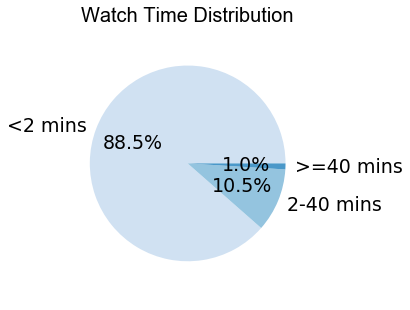

In [30]:
total = [3147, 373, 35]
app_labels = ['<2 mins', '2-40 mins', '>=40 mins']
fig, ax = plt.subplots(1,1,figsize=(5,5)) #ax1,ax2 refer to your two pies
ax.pie(total, labels = app_labels, colors = color1, radius = 0.9, autopct = '%1.1f%%', textprops={'fontsize': 19}) #plot second pie
ax.set_title('Watch Time Distribution', fontsize = 20, **Afont)


Text(0.5, 1.0, 'Mobile App Watch Time Distribution')

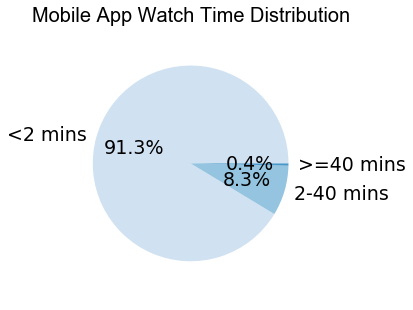

In [31]:
mobile_app = [485, 44, 2]
app_labels = ['<2 mins', '2-40 mins', '>=40 mins']
fig, ax = plt.subplots(1,1,figsize=(5,5)) #ax1,ax2 refer to your two pies
ax.pie(mobile_app, labels = app_labels, colors = color1, radius = 0.9, autopct = '%1.1f%%', textprops={'fontsize': 19}) #plot second pie
ax.set_title('Mobile App Watch Time Distribution', fontsize = 20, **Afont)


Text(0.5, 1.0, 'Mobiel Web Watch Time Distribution')

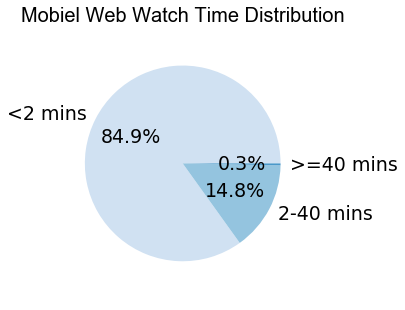

In [32]:
mobile_web = [1063, 185, 4]
web_labels = ['<2 mins', '2-40 mins', '>=40 mins']
fig, ax = plt.subplots(1,1,figsize=(5,5)) #ax1,ax2 refer to your two pies
ax.pie(mobile_web, labels = web_labels, colors = color1, radius = 0.9, autopct = '%1.1f%%', textprops={'fontsize': 19}) #plot second pie
ax.set_title('Mobiel Web Watch Time Distribution', fontsize = 20, **Afont)

In [35]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.xaxis.set_major_formatter(formatter)

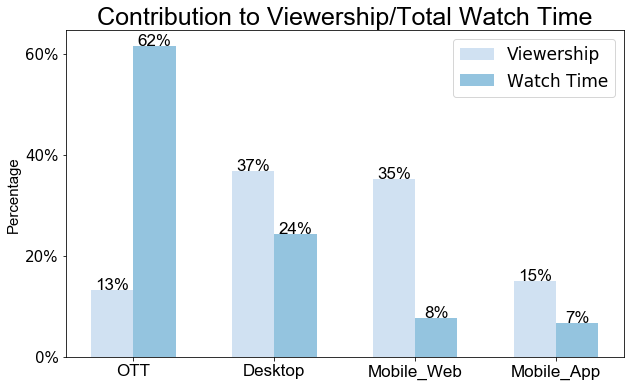

In [36]:
Viewership = (0.132, 0.367, 0.352, 0.149)
Duration = (0.615, 0.243, 0.076, 0.066)


ind = np.arange(4)  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(ind - 0.5*width, Viewership, width,
                label='Viewership', color=color1[0])
rects2 = ax.bar(ind + 0.5*width, Duration, width,
                label='Watch Time', color=color1[1])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize = 15, **Afont)
ax.set_title('Contribution to Viewership/Total Watch Time', fontsize = 25, **Afont)
ax.set_xticks(ind)
ax.set_xticklabels(('OTT', 'Desktop', 'Mobile_Web', 'Mobile_App'), fontsize = 17, **Afont)
ax.legend(fontsize = 17)
plt.locator_params(axis='y', nbins=4)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.yticks(fontsize=15)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-0.01),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', fontsize = 17, **Afont)

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

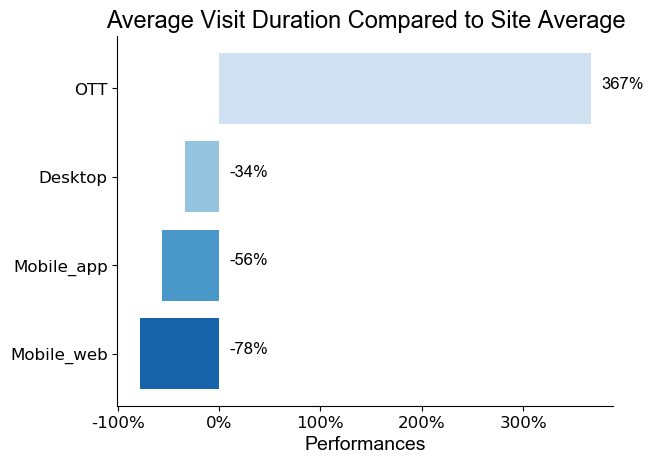

In [37]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
platforms = ('OTT', 'Desktop', 'Mobile_app', 'Mobile_web')
y_pos = np.arange(len(platforms))
performances = (3.67, -0.34, -0.56, -0.78)


ax.barh(y_pos, performances, align='center', color = color1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks(y_pos)
ax.set_yticklabels(platforms, fontsize = 12)
ax.invert_yaxis()  # labels read top-to-bottom

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=12)
ax.set_xlabel('Performances', **Afont, fontsize = 14)
ax.set_title('Average Visit Duration Compared to Site Average', **Afont, fontsize = 17)
for i,val in enumerate(performances):
    if val >= 0:
        ax.text(val + 0.1, i, str("{:.0%}".format(val)), color="black", fontsize=12, **Afont)
    else:
        ax.text(0.1, i, str("{:.0%}".format(val)), color="black", fontsize=12, **Afont)

plt.show()